<a href="https://colab.research.google.com/github/VanshShah18/BCSE331L-EDA-22BDS0321/blob/main/22BDS0321.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup (libraries)

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_columns', None)
sns.set()

Load Data

In [68]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/penguins_size.csv"
df = pd.read_csv(url)
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Dimensions

In [69]:
df.shape, df.columns.tolist()


((344, 7),
 ['species',
  'island',
  'culmen_length_mm',
  'culmen_depth_mm',
  'flipper_length_mm',
  'body_mass_g',
  'sex'])

Quick Info & Summary Statistics

In [70]:
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species,344,4,Adelie,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,343,3,Biscoe,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
culmen_length_mm,342.0,NaN,NaN,NaN,43.92193,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,NaN,NaN,NaN,17.15117,1.974793,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,341.0,NaN,NaN,NaN,200.8739,14.061585,172.0,190.0,197.0,213.0,231.0
body_mass_g,342.0,NaN,NaN,NaN,4201.754386,801.954536,2700.0,3550.0,4050.0,4750.0,6300.0
sex,334,3,MALE,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing Values & Basic Data Handling

In [71]:
df.isnull().sum()
# Drop rows with NA for now
df_clean = df.dropna().copy()
df_clean.isnull().sum()


,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


Data Types & Basic Fixes

In [72]:
# convert obvious categoricals
for col in ['species', 'island', 'sex']:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

df_clean.dtypes


,0
species,category
island,category
culmen_length_mm,float64
culmen_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,category


Univariate Analysis (Basic)

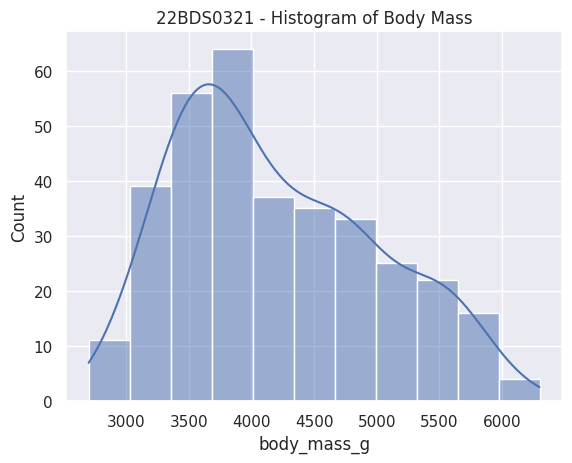

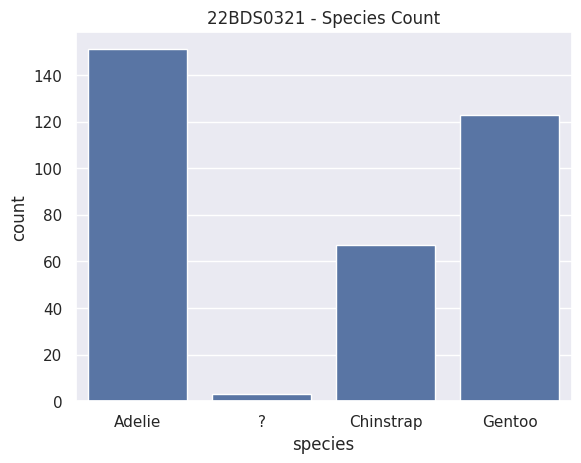

In [73]:
# Example numeric distributions
sns.histplot(df['body_mass_g'], kde=True)
plt.title("22BDS0321 - Histogram of Body Mass")
plt.show()

sns.countplot(x='species', data=df)
plt.title("22BDS0321 - Species Count")
plt.show()

Univariate Analysis (Detailed)

In [74]:
# ---- Numerical measures ----
num_col = 'culmen_length_mm'
cat_col = 'species'

print("Arithmetic Mean:", df[num_col].mean())
print("Weighted Mean:", np.average(df[num_col], weights=df['flipper_length_mm']))
print("RMS:", np.sqrt(np.mean(df[num_col]**2)))
print("Harmonic Mean:", stats.hmean(df[num_col]))
print("Geometric Mean:", stats.gmean(df[num_col]))
print("Median:", df[num_col].median())
print("Mode:", df[num_col].mode()[0])
print("Quartiles:\n", df[num_col].quantile([0.25,0.5,0.75]))
print("Deciles:\n", df[num_col].quantile([i/10 for i in range(1,10)]))
print("90th Percentile:", df[num_col].quantile(0.9))
print("Range:", df[num_col].max()-df[num_col].min())
print("IQR:", stats.iqr(df[num_col]))
print("Variance:", df[num_col].var())
print("Std Dev:", df[num_col].std())
print("Skewness:", df[num_col].skew())
print("Kurtosis:", df[num_col].kurt())

Arithmetic Mean: 43.9219298245614
Weighted Mean: nan
RMS: 44.25896314548557
Harmonic Mean: nan
Geometric Mean: nan
Median: 44.45
Mode: 41.1
Quartiles:
 0.25    39.225
0.50    44.450
0.75    48.500
Name: culmen_length_mm, dtype: float64
Deciles:
 0.1    36.60
0.2    38.34
0.3    40.20
0.4    42.00
0.5    44.45
0.6    46.00
0.7    47.37
0.8    49.38
0.9    50.80
Name: culmen_length_mm, dtype: float64
90th Percentile: 50.8
Range: 27.5
IQR: nan
Variance: 29.80705432937183
Std Dev: 5.459583713926532
Skewness: 0.05311806699132413
Kurtosis: -0.8760269663060134


In [75]:
# Frequency tables for categorical variable
print("Frequency Table:\n", df[cat_col].value_counts())
print("Relative Frequency:\n", df[cat_col].value_counts(normalize=True))


Frequency Table:
 species
Adelie       151
Gentoo       123
Chinstrap     67
?              3
Name: count, dtype: int64
Relative Frequency:
 species
Adelie       0.438953
Gentoo       0.357558
Chinstrap    0.194767
?            0.008721
Name: proportion, dtype: float64


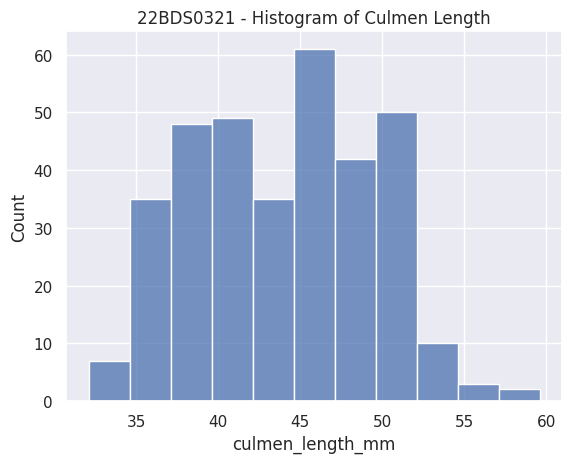

In [76]:
# Plots
# Histogram of culmen length
sns.histplot(df[num_col], kde=False)
plt.title("22BDS0321 - Histogram of Culmen Length")
plt.show()



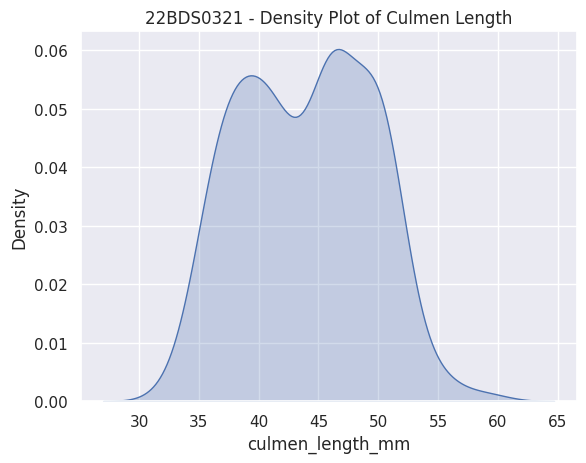

In [77]:

# Density plot of culmen length
sns.kdeplot(df[num_col], fill=True)
plt.title("22BDS0321 - Density Plot of Culmen Length")
plt.show()

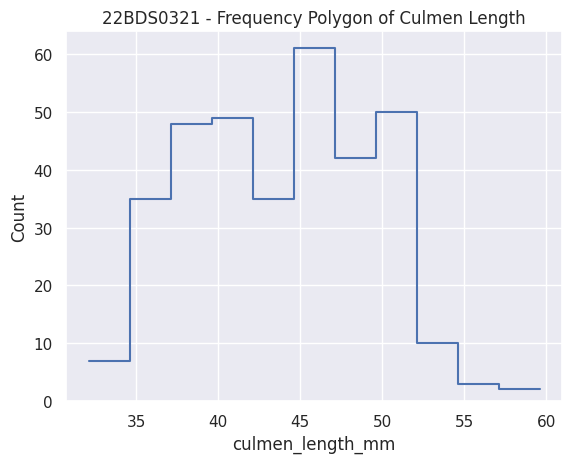

In [78]:
# Frequency polygon of culmen length
sns.histplot(df[num_col], kde=False, element="step", fill=False)
plt.title("22BDS0321 - Frequency Polygon of Culmen Length")
plt.show()

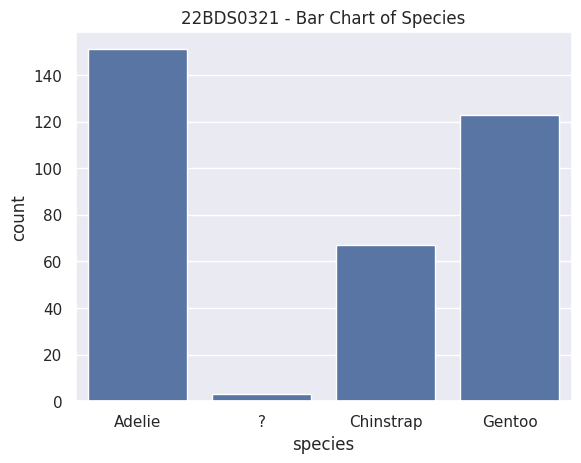

In [79]:
# Bar chart for species
sns.countplot(x=cat_col, data=df)
plt.title("22BDS0321 - Bar Chart of Species")
plt.show()

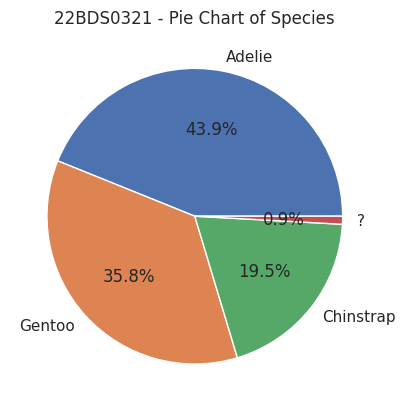

In [80]:
# Pie chart of species proportions
df[cat_col].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("22BDS0321 - Pie Chart of Species")
plt.ylabel("")
plt.show()

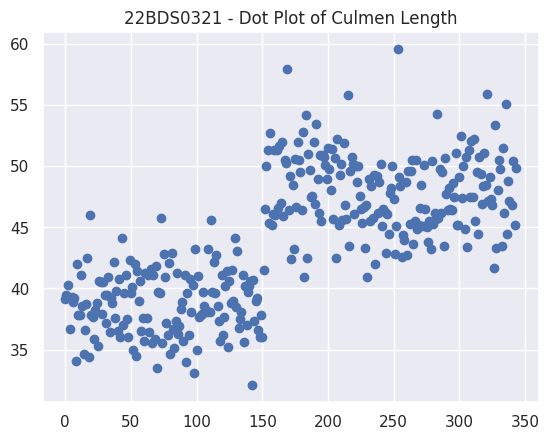

In [81]:
# Dot plot of culmen length
plt.plot(df[num_col], 'o')
plt.title("22BDS0321 - Dot Plot of Culmen Length")
plt.show()

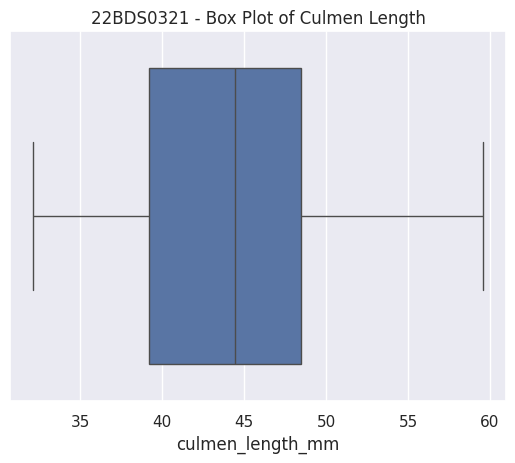

In [82]:
# Box plot of culmen length
sns.boxplot(x=df[num_col])
plt.title("22BDS0321 - Box Plot of Culmen Length")
plt.show()

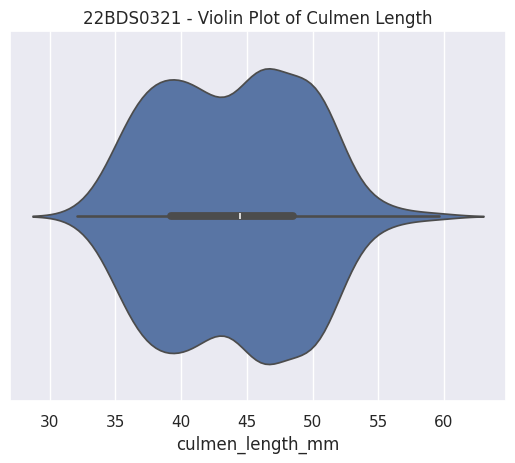

In [83]:
# Violin plot of culmen length
sns.violinplot(x=df[num_col])
plt.title("22BDS0321 - Violin Plot of Culmen Length")
plt.show()

Binned counts:
 culmen_bins
(43.1, 48.6]      104
(37.6, 43.1]      103
(48.6, 54.1]       76
(32.072, 37.6]     52
(54.1, 59.6]        7
Name: count, dtype: int64


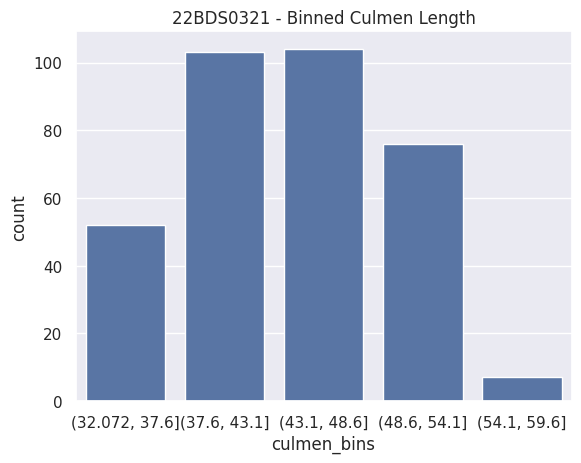

In [84]:
# Binned plots
df['culmen_bins'] = pd.cut(df[num_col], bins=5)
print("Binned counts:\n", df['culmen_bins'].value_counts())
sns.countplot(x='culmen_bins', data=df)
plt.title("22BDS0321 - Binned Culmen Length")
plt.show()

 Bivariate Analysis

In [85]:
# (A) Numeric vs Numeric

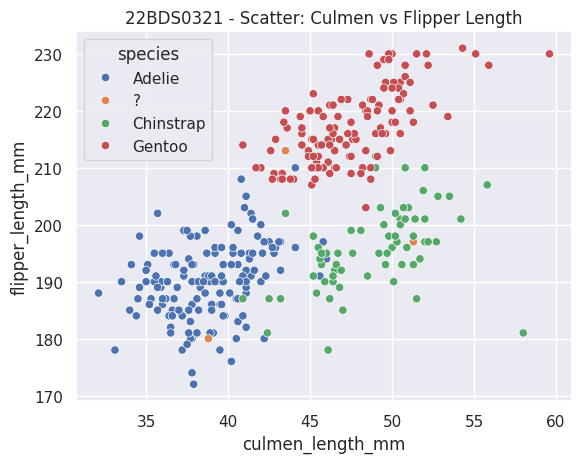

In [86]:
# Scatter plot: culmen length vs flipper length
sns.scatterplot(x='culmen_length_mm', y='flipper_length_mm', data=df, hue='species')
plt.title("22BDS0321 - Scatter: Culmen vs Flipper Length")
plt.show()

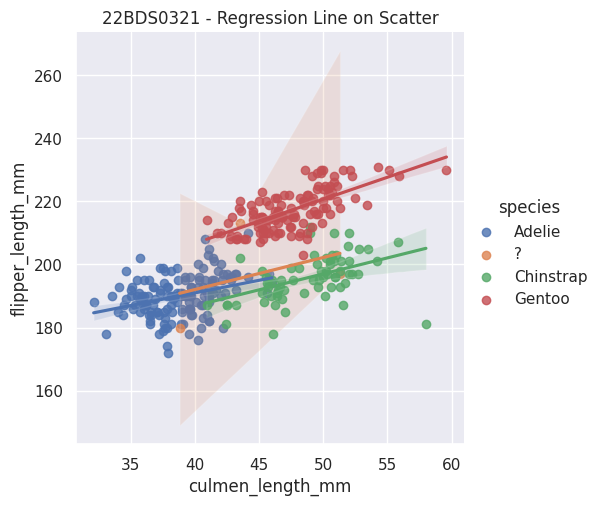

In [87]:
# Scatter with regression line
sns.lmplot(x='culmen_length_mm', y='flipper_length_mm', data=df, hue='species')
plt.title("22BDS0321 - Regression Line on Scatter")
plt.show()

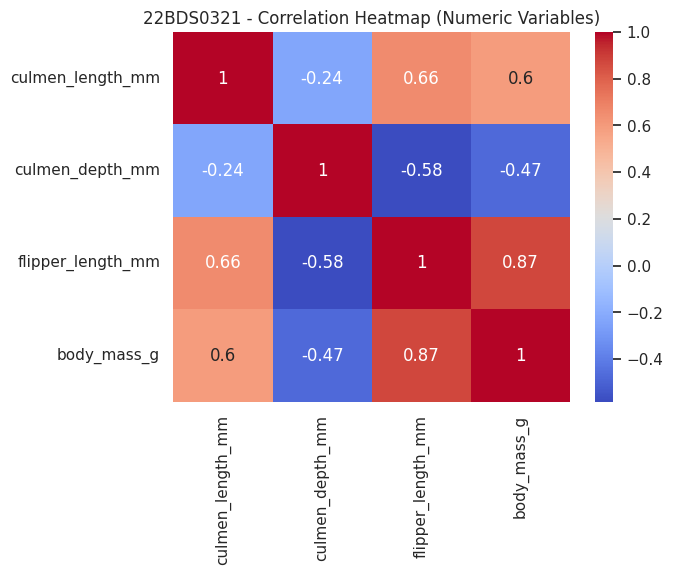

In [88]:
# Correlation heatmap of numeric variables
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("22BDS0321 - Correlation Heatmap (Numeric Variables)")
plt.show()

In [89]:
# (B) Categorical vs Numeric

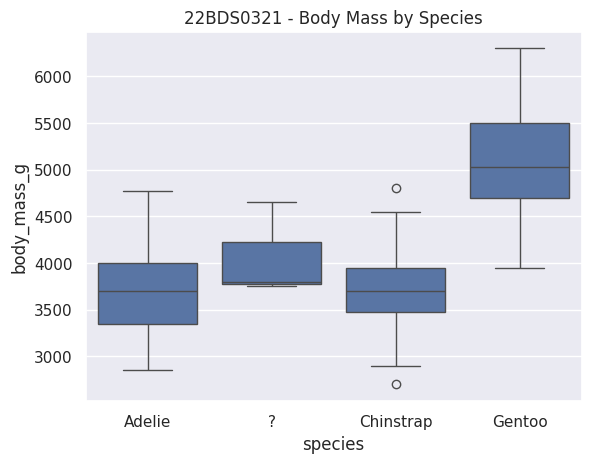

In [90]:
# Box plot: body mass grouped by species
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title("22BDS0321 - Body Mass by Species")
plt.show()

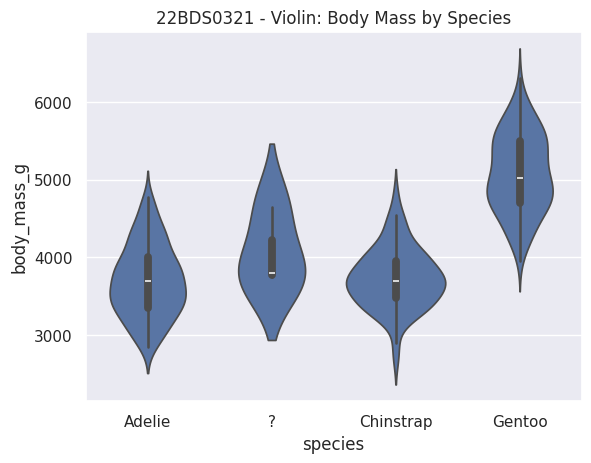

In [91]:

# Violin plot: body mass grouped by species
sns.violinplot(x='species', y='body_mass_g', data=df)
plt.title("22BDS0321 - Violin: Body Mass by Species")
plt.show()

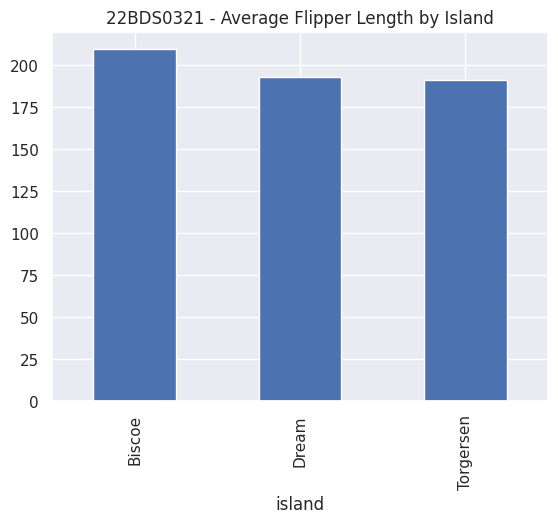

In [92]:
# Bar chart of mean flipper length by island
df.groupby('island')['flipper_length_mm'].mean().plot(kind='bar')
plt.title("22BDS0321 - Average Flipper Length by Island")
plt.show()

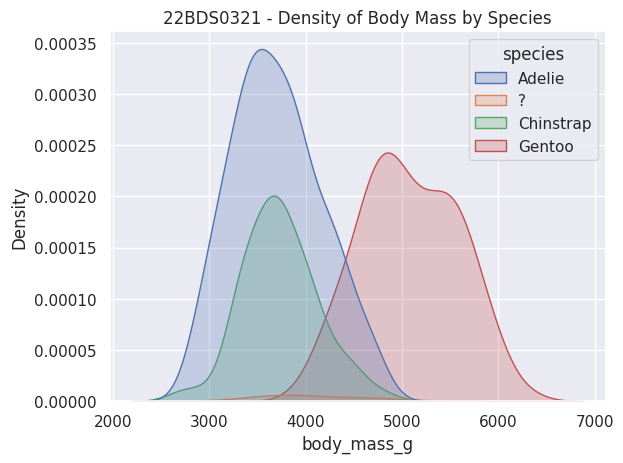

In [93]:
# Density plot of body mass by species
sns.kdeplot(data=df, x='body_mass_g', hue='species', fill=True)
plt.title("22BDS0321 - Density of Body Mass by Species")
plt.show()

In [94]:
# (C) Categorical vs Categorical


In [95]:
# Contingency table: species × island
ct1 = pd.crosstab(df['species'], df['island'])
print(ct1)

island     Biscoe  Dream  Torgersen
species                            
?               2      1          0
Adelie         43     56         52
Chinstrap       0     67          0
Gentoo        122      0          0


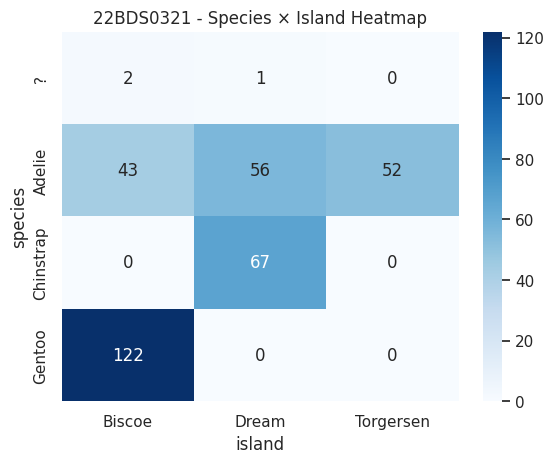

In [96]:
# Heatmap of species × island
sns.heatmap(ct1, annot=True, fmt='d', cmap='Blues')
plt.title("22BDS0321 - Species × Island Heatmap")
plt.show()

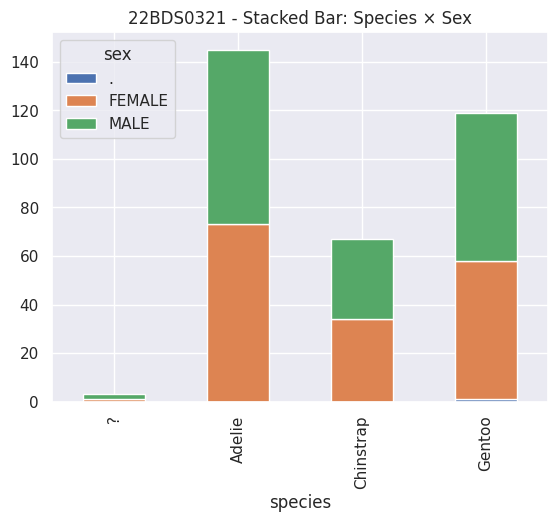

In [97]:
# Stacked bar chart: species × sex
pd.crosstab(df['species'], df['sex']).plot(kind='bar', stacked=True)
plt.title("22BDS0321 - Stacked Bar: Species × Sex")
plt.show()

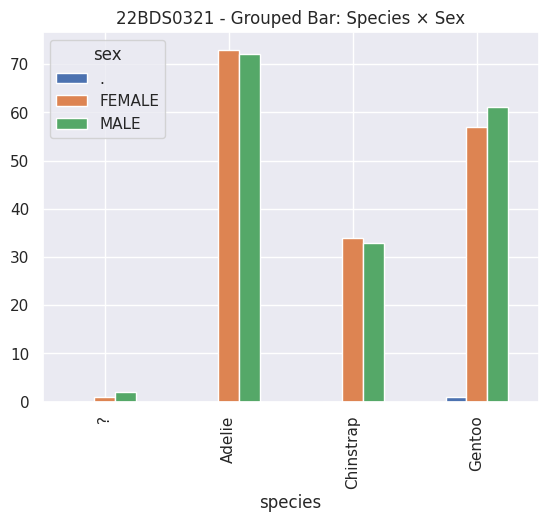

In [98]:
# Grouped bar chart: species × sex
pd.crosstab(df['species'], df['sex']).plot(kind='bar')
plt.title("22BDS0321 - Grouped Bar: Species × Sex")
plt.show()

 Multivariate Analysis

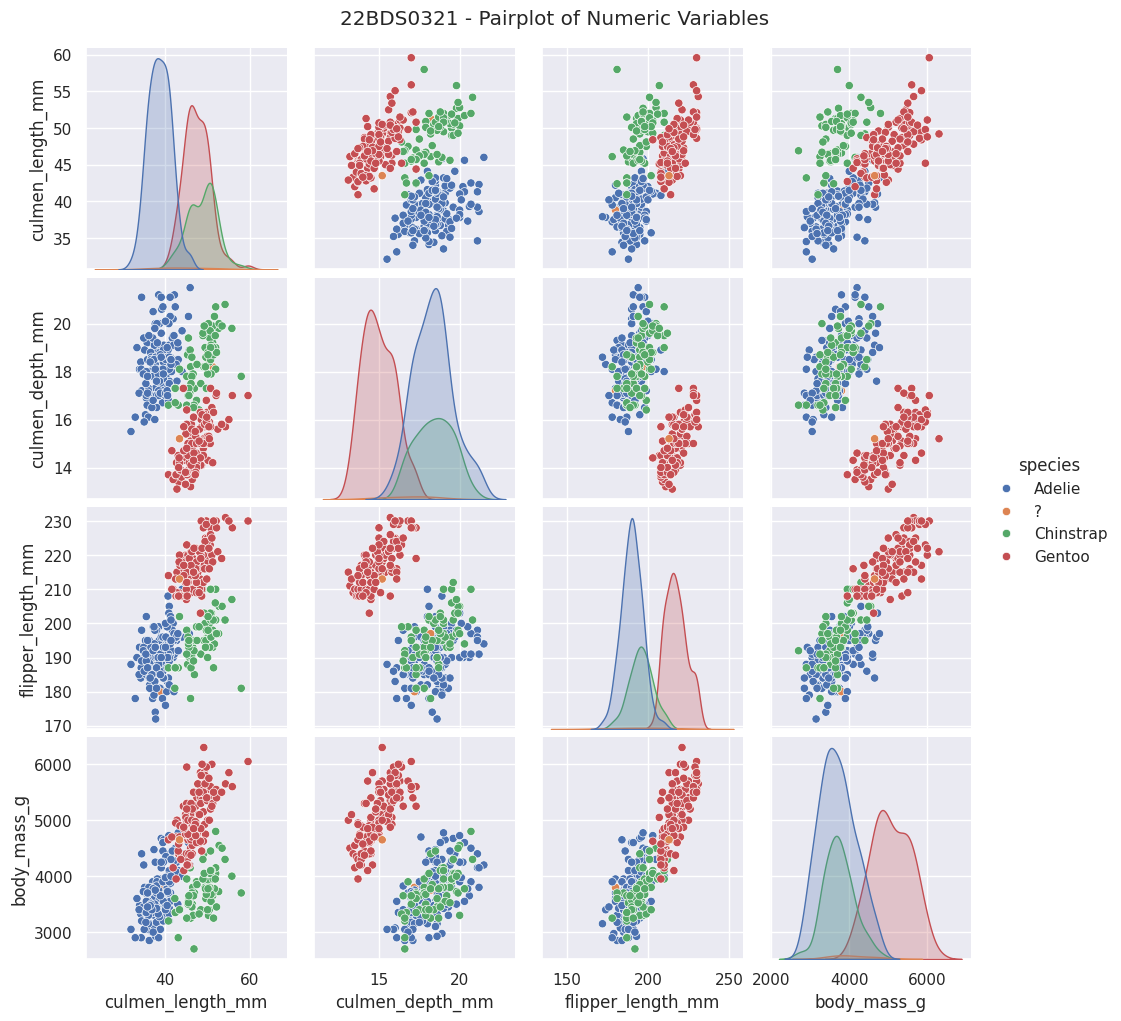

In [99]:
# Pairplot of numeric variables, colored by species
sns.pairplot(df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','species']], hue='species')
plt.suptitle("22BDS0321 - Pairplot of Numeric Variables", y=1.02)
plt.show()

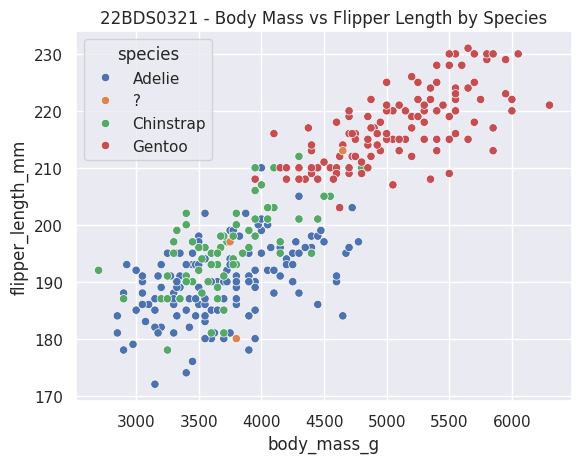

In [100]:
# Scatter: body mass vs flipper length by species
sns.scatterplot(x='body_mass_g', y='flipper_length_mm', hue='species', data=df)
plt.title("22BDS0321 - Body Mass vs Flipper Length by Species")
plt.show()

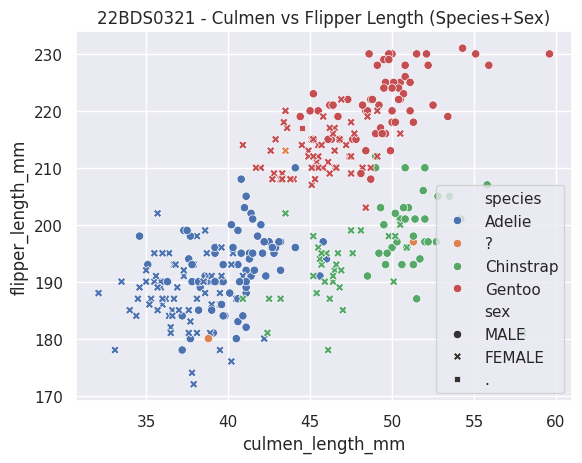

In [101]:
# Scatter with color (species) and style (sex)
sns.scatterplot(x='culmen_length_mm', y='flipper_length_mm', hue='species', style='sex', data=df)
plt.title("22BDS0321 - Culmen vs Flipper Length (Species+Sex)")
plt.show()

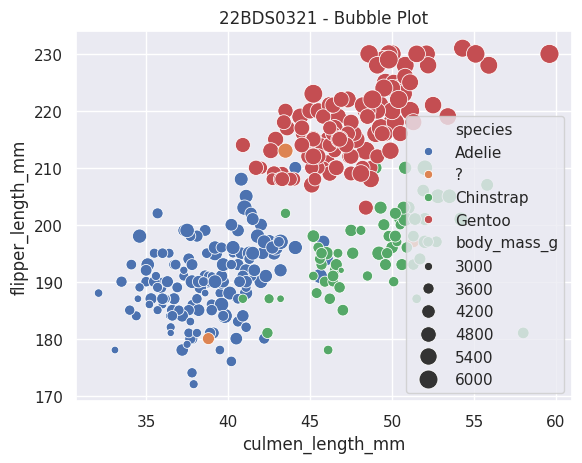

In [102]:
# Bubble plot with size = body mass
sns.scatterplot(x='culmen_length_mm', y='flipper_length_mm', size='body_mass_g', hue='species',
                data=df, sizes=(20,200))
plt.title("22BDS0321 - Bubble Plot")
plt.show()

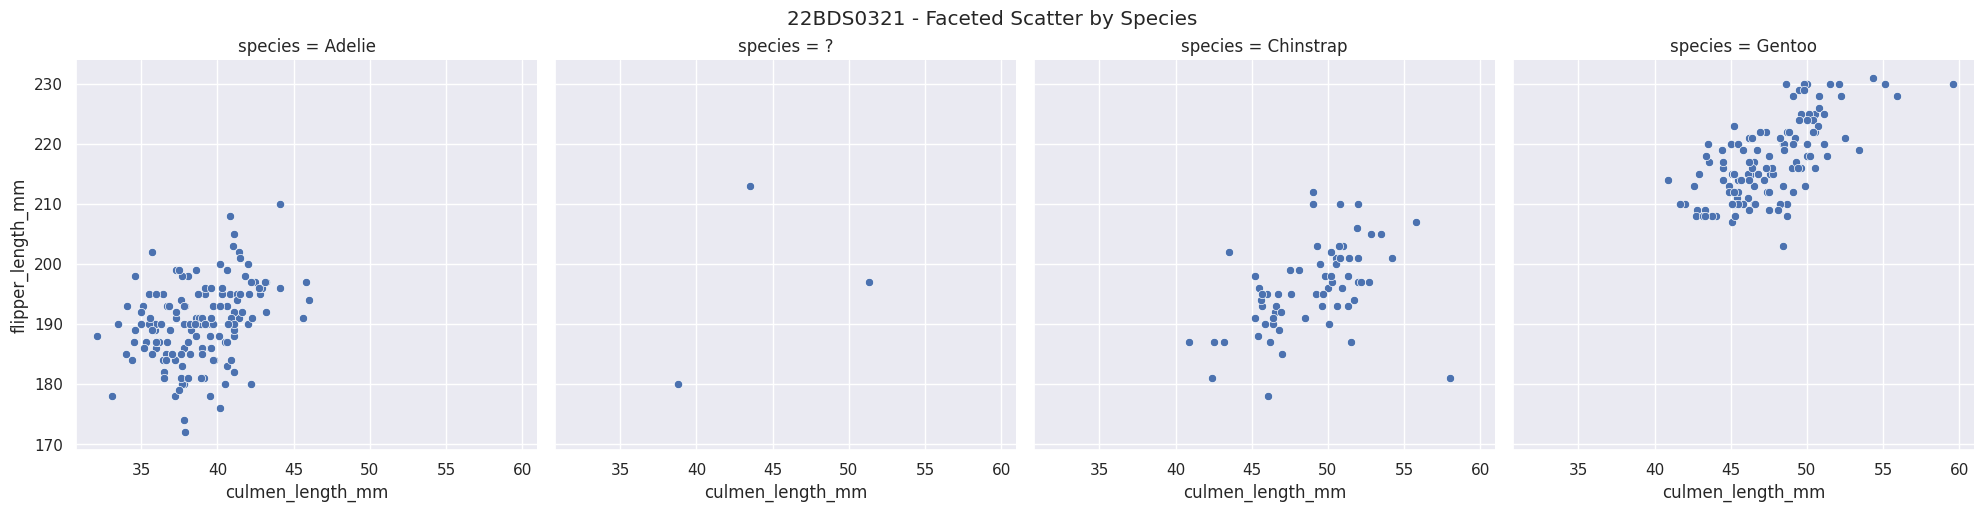

In [103]:
# Faceted scatter plots by species
sns.relplot(x='culmen_length_mm', y='flipper_length_mm', col='species', data=df, kind='scatter')
plt.suptitle("22BDS0321 - Faceted Scatter by Species", y=1.02)
plt.show()


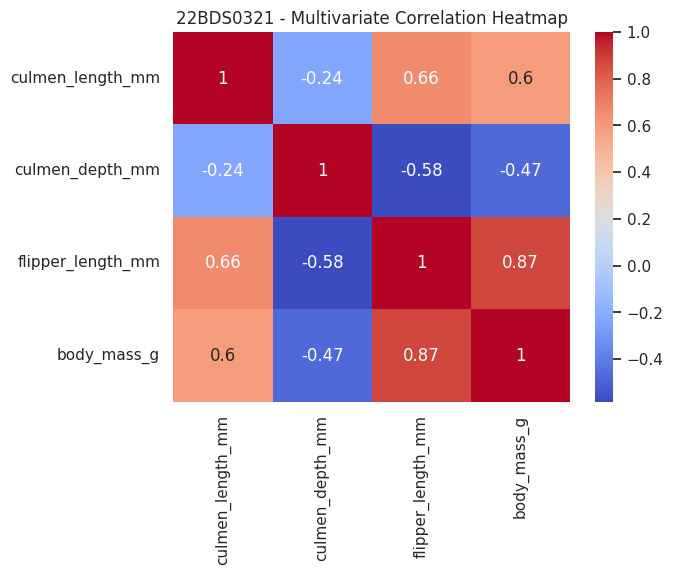

In [104]:
# Correlation heatmap again for all numeric
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("22BDS0321 - Multivariate Correlation Heatmap")
plt.show()

Cluster Analysis (K-Means)

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [106]:
# (a) Set random seed for reproducibility
np.random.seed(120)

In [107]:

# (b) Extract and scale numeric columns
num_cols = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
num_df = df[num_cols].dropna()   # cleaned numeric subset

scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_df)

In [108]:
# (c) Compute total within-cluster sum of squares (WCSS) for range of k
wcss = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=120, n_init=10)
    kmeans.fit(num_scaled)
    wcss.append(kmeans.inertia_)

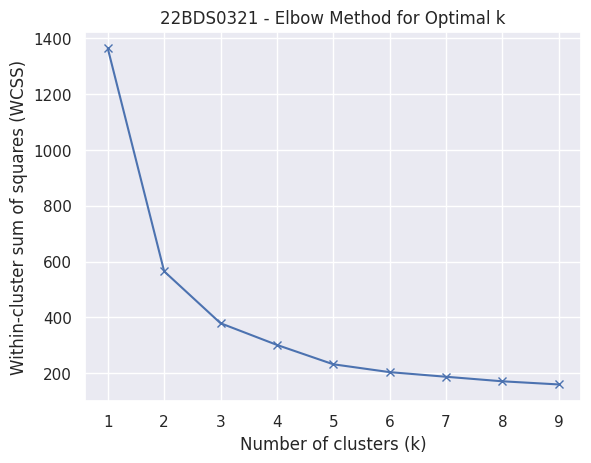

In [109]:
# (d) Plot WCSS vs k (Elbow method)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('22BDS0321 - Elbow Method for Optimal k')
plt.show()

In [110]:
# (e) Apply K-Means algorithm with optimal k (choose 3 here for penguins)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=120, n_init=10)
num_df['Cluster'] = kmeans.fit_predict(num_scaled)

# Merge clusters back into main df
df.loc[num_df.index, 'Cluster'] = num_df['Cluster']

print("Cluster Centers (scaled):\n", kmeans.cluster_centers_)

Cluster Centers (scaled):
 [[-1.04531959  0.48388726 -0.88828631 -0.76771187]
 [ 0.65883554 -1.10410837  1.16309907  1.09552273]
 [ 0.66211781  0.81411612 -0.28326774 -0.37144605]]


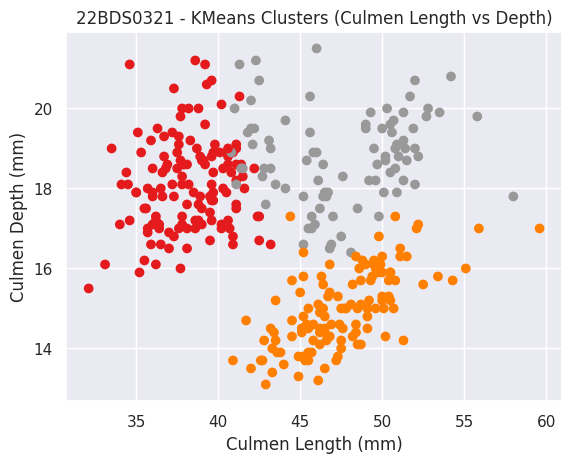

In [111]:
# (f1) Base scatter plot: clustered numeric variables
plt.scatter(num_df['culmen_length_mm'], num_df['culmen_depth_mm'],
            c=num_df['Cluster'], cmap='Set1')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('22BDS0321 - KMeans Clusters (Culmen Length vs Depth)')
plt.show()

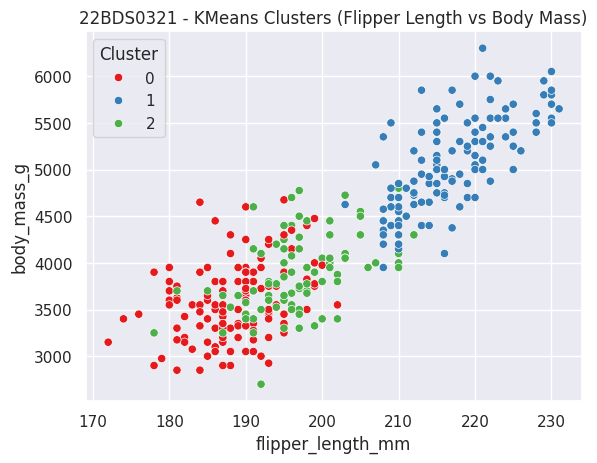

In [112]:
# (f2) "ggplot-style" scatter: flipper length vs body mass, colored by cluster
sns.scatterplot(x='flipper_length_mm', y='body_mass_g',
                hue='Cluster', data=num_df, palette='Set1')
plt.title('22BDS0321 - KMeans Clusters (Flipper Length vs Body Mass)')
plt.show()

Principal Component Analysis (PCA)

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [114]:
# 1. Select numeric columns for PCA
numeric_cols = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
X = df[numeric_cols].dropna()


In [115]:
# 2. Standardize numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [116]:
# 3. Perform PCA (all components first)
pca = PCA()
pca.fit(X_scaled)

PCA()

In [117]:
# 4. Eigenvalues = explained variance
eigenvalues = pca.explained_variance_
print("Eigenvalues:\n", eigenvalues, "\n")


Eigenvalues:
 [2.75967882 0.77596332 0.36700435 0.10911822] 



In [118]:
# Component loadings (weights of original variables in PCs)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(numeric_cols))],
    index=numeric_cols
)
print("Component Loadings:\n", loadings, "\n")

Component Loadings:
                         PC1       PC2       PC3       PC4
culmen_length_mm   0.455275  0.596410  0.644817 -0.145706
culmen_depth_mm   -0.399911  0.798210 -0.417949  0.168078
flipper_length_mm  0.576186  0.002263 -0.231811  0.783752
body_mass_g        0.548456  0.084562 -0.596484 -0.579872 



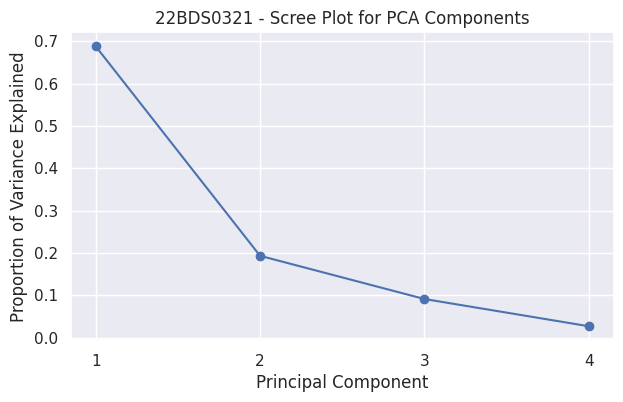

In [119]:
# 5. Scree plot – variance explained by each component
plt.figure(figsize=(7,4))
plt.plot(range(1, len(eigenvalues)+1),
         pca.explained_variance_ratio_,
         marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.title("22BDS0321 - Scree Plot for PCA Components")
plt.xticks(range(1, len(eigenvalues)+1))
plt.grid(True)
plt.show()


In [120]:
# choose n_comp = 2 (based on scree plot)
n_comp = 2

pca2 = PCA(n_components=n_comp)
X_pca = pca2.fit_transform(X_scaled)

print(f"\nSelected {n_comp} PCA Components")
print("Variance captured:", pca2.explained_variance_ratio_, "\n")




Selected 2 PCA Components
Variance captured: [0.68789648 0.19342194] 



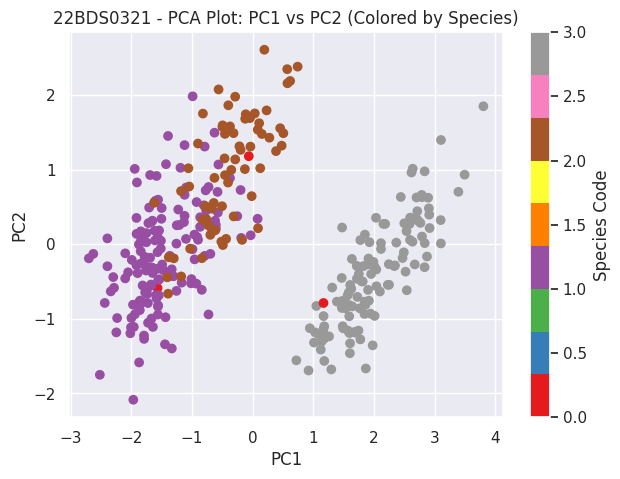

In [121]:
# 6. Scatter plot of first two PCs
df['species'] = df['species'].astype('category')

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0],
            X_pca[:,1],
            c=df.loc[X.index, 'species'].cat.codes,
            cmap='Set1')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("22BDS0321 - PCA Plot: PC1 vs PC2 (Colored by Species)")
plt.colorbar(label="Species Code")
plt.grid(True)
plt.show()


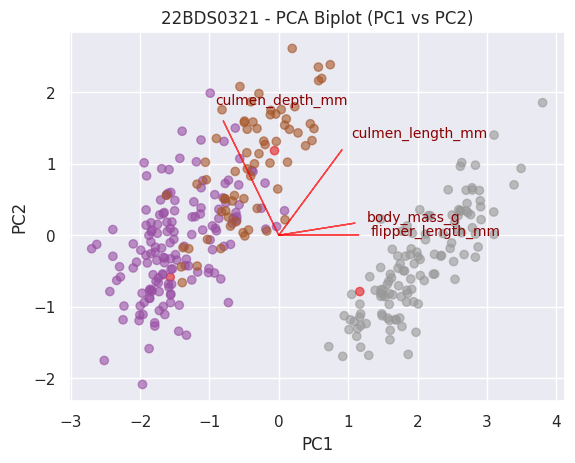

In [122]:
# 7. PCA Biplot (PC1 vs PC2)
plt.scatter(X_pca[:,0],
            X_pca[:,1],
            c=df.loc[X.index, 'species'].cat.codes,
            cmap='Set1',
            alpha=0.6)

# Add loading vectors (arrows)
for i, variable in enumerate(numeric_cols):
    plt.arrow(0, 0,
              loadings.loc[variable, 'PC1'] * 2,
              loadings.loc[variable, 'PC2'] * 2,
              color='red', alpha=0.7)
    plt.text(loadings.loc[variable, 'PC1'] * 2.3,
             loadings.loc[variable, 'PC2'] * 2.3,
             variable,
             color='darkred',
             fontsize=10)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("22BDS0321 - PCA Biplot (PC1 vs PC2)")
plt.grid(True)
plt.show()


Linear & Multiple Regression Analysis

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [124]:
# Selecting required numeric variables from penguins dataset
# Target variable: body_mass_g
# Predictor for simple regression: flipper_length_mm

# Remove rows with missing values for these columns
df_clean = df.dropna(subset=[
    'body_mass_g',
    'flipper_length_mm',
    'culmen_length_mm',
    'culmen_depth_mm'
])

# Simple regression X and y
X_simple = df_clean[['flipper_length_mm']]
y = df_clean['body_mass_g']


In [125]:
# Display summary statistics for variables used in regression
print("Summary statistics:\n")
print(df_clean[['flipper_length_mm', 'body_mass_g']].describe())


Summary statistics:

       flipper_length_mm  body_mass_g
count         341.000000   341.000000
mean          200.873900  4199.486804
std            14.061585   802.034243
min           172.000000  2700.000000
25%           190.000000  3550.000000
50%           197.000000  4050.000000
75%           213.000000  4750.000000
max           231.000000  6300.000000


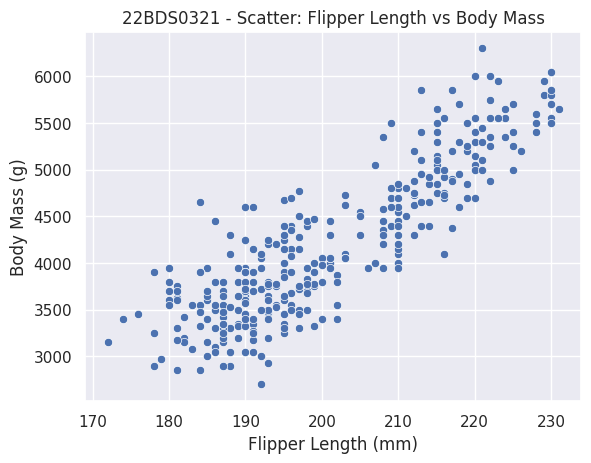

In [126]:
# Scatter plot to see basic relationship between predictor and target
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df_clean)
plt.title("22BDS0321 - Scatter: Flipper Length vs Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()


In [127]:
# Fit a simple linear regression model
lr = LinearRegression()
lr.fit(X_simple, y)

# Print intercept and slope (β0 and β1)
print("Intercept:", lr.intercept_)
print("Slope:", lr.coef_[0])


Intercept: -5777.947156688077
Slope: 49.67013606865359


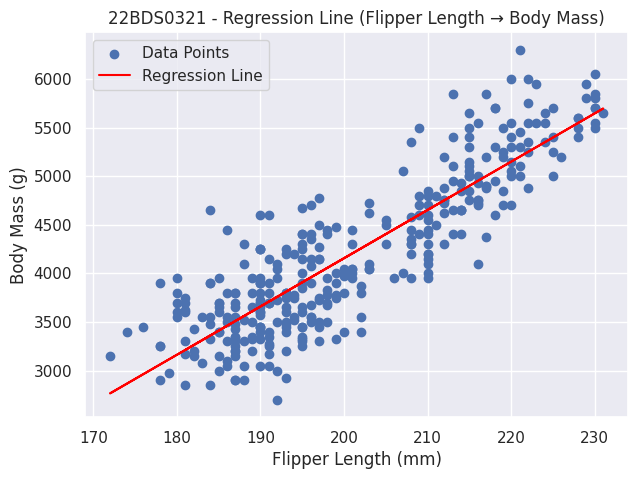

In [128]:
# Plot the regression line over the scatterplot
plt.figure(figsize=(7,5))
plt.scatter(df_clean['flipper_length_mm'], y, label="Data Points")

# Predicted line
plt.plot(df_clean['flipper_length_mm'], lr.predict(X_simple),
         color='red', label="Regression Line")

plt.title("22BDS0321 - Regression Line (Flipper Length → Body Mass)")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend()
plt.show()


In [129]:
# Predict using the model
y_pred = lr.predict(X_simple)

# Calculate error metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)


MSE : 154983.4931669934
RMSE: 393.6794294435428
MAE : 313.6937203420844


In [130]:
# R² using sklearn
r2_auto = r2_score(y, y_pred)

# R² manually computed
sst = np.sum((y - y.mean())**2)
ssr = np.sum((y_pred - y.mean())**2)
r2_manual = ssr / sst

print("R² (Auto) :", r2_auto)
print("R² (Manual):", r2_manual)


R² (Auto) : 0.7583565179766547
R² (Manual): 0.7583565179766555


In [131]:
# Multi-regression predictors
X_multi = df_clean[['flipper_length_mm',
                    'culmen_length_mm',
                    'culmen_depth_mm']]

y_multi = df_clean['body_mass_g']

# statsmodels requires adding constant term
X_multi_sm = sm.add_constant(X_multi)

# Fit OLS multiple linear regression model
model_multi = sm.OLS(y_multi, X_multi_sm).fit()

# Show regression summary
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     357.4
Date:                Fri, 07 Nov 2025   Prob (F-statistic):          2.59e-104
Time:                        17:07:51   Log-Likelihood:                -2519.7
No. Observations:                 341   AIC:                             5047.
Df Residuals:                     337   BIC:                             5063.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6423.0592    562.31

In [132]:
# Check VIF for each numeric predictor
vif_df = pd.DataFrame()
vif_df['Feature'] = X_multi.columns
vif_df['VIF'] = [vif(X_multi.values, i) for i in range(X_multi.shape[1])]

print("\nVariance Inflation Factors:\n")
print(vif_df)



Variance Inflation Factors:

             Feature         VIF
0  flipper_length_mm  145.414766
1   culmen_length_mm  113.777759
2    culmen_depth_mm   37.040818


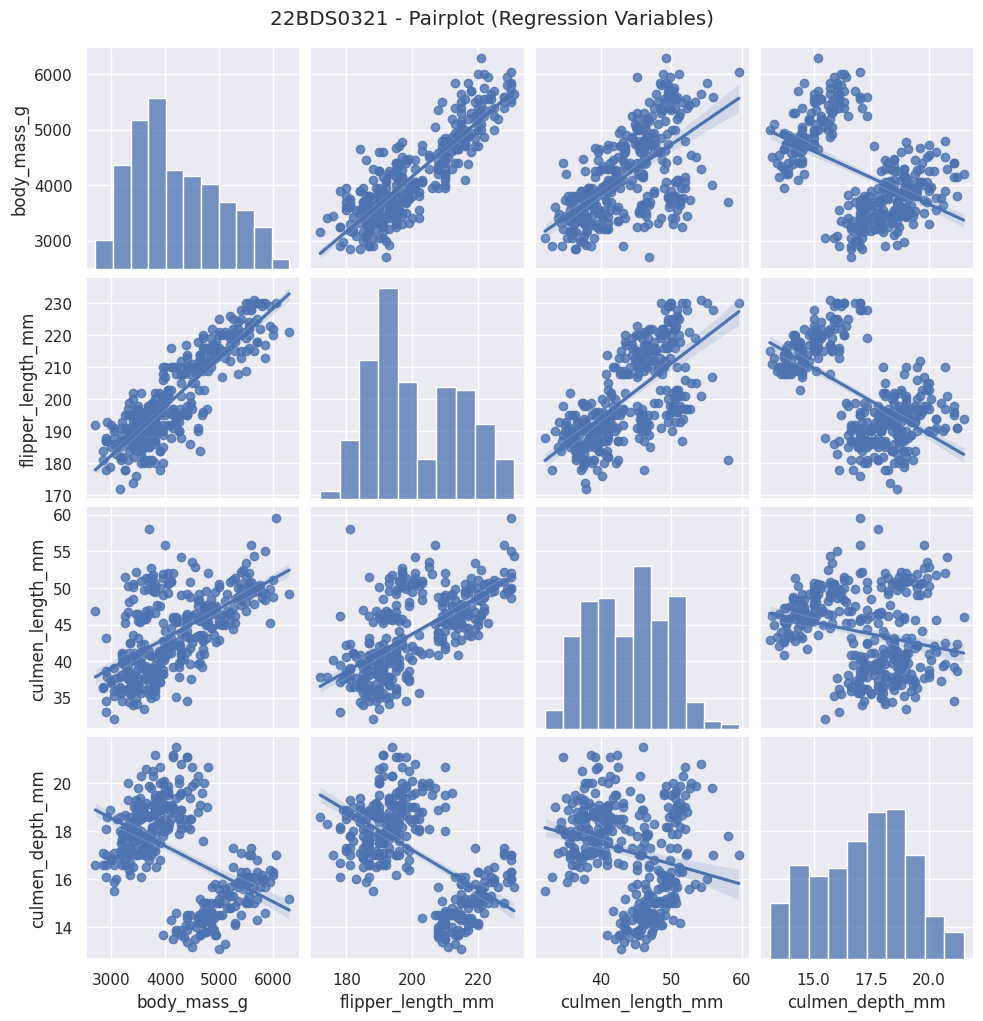

In [133]:
# Pairplot to show relations among all regression variables
sns.pairplot(df_clean[['body_mass_g',
                       'flipper_length_mm',
                       'culmen_length_mm',
                       'culmen_depth_mm']],
             kind='reg')

plt.suptitle("22BDS0321 - Pairplot (Regression Variables)", y=1.02)
plt.show()


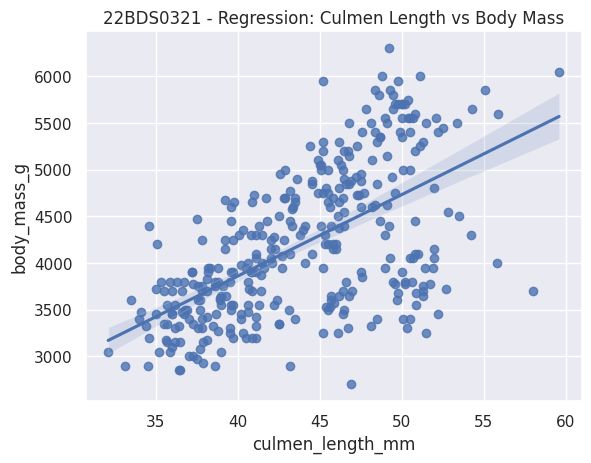

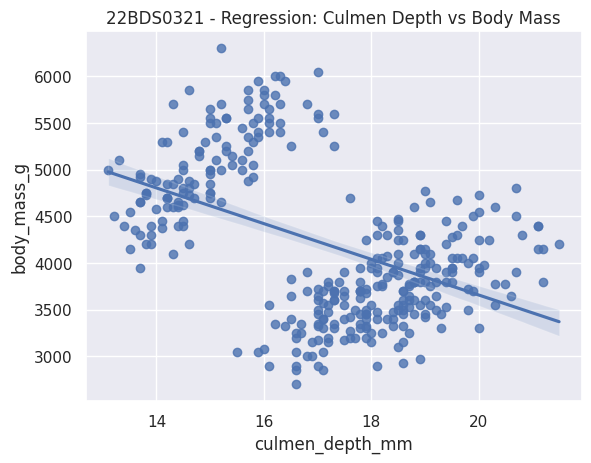

In [134]:
# Regression of Culmen Length vs Body Mass
sns.regplot(x='culmen_length_mm', y='body_mass_g', data=df_clean)
plt.title("22BDS0321 - Regression: Culmen Length vs Body Mass")
plt.show()

# Regression of Culmen Depth vs Body Mass
sns.regplot(x='culmen_depth_mm', y='body_mass_g', data=df_clean)
plt.title("22BDS0321 - Regression: Culmen Depth vs Body Mass")
plt.show()


MODEL EVALUATION

MSE (Mean Squared Error): 153384.5878
RMSE (Root Mean Squared Error): 391.6434
MAE (Mean Absolute Error): 311.1023
R² Score: 0.7608
Adjusted R²: 0.7587
MAPE: 7.74%
Explained Variance Score: 0.7608

Residual Summary Statistics:
count    3.410000e+02
mean    -4.598149e-12
std      3.922190e+02
min     -1.054785e+03
25%     -2.937196e+02
50%     -2.187580e+01
75%      2.395147e+02
max      1.276562e+03
dtype: float64


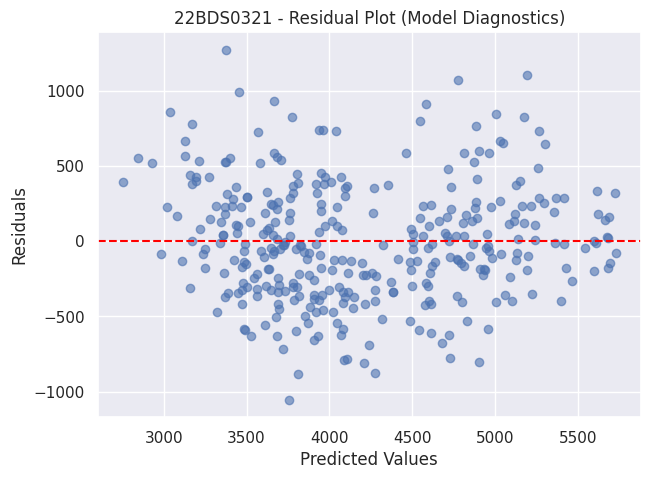

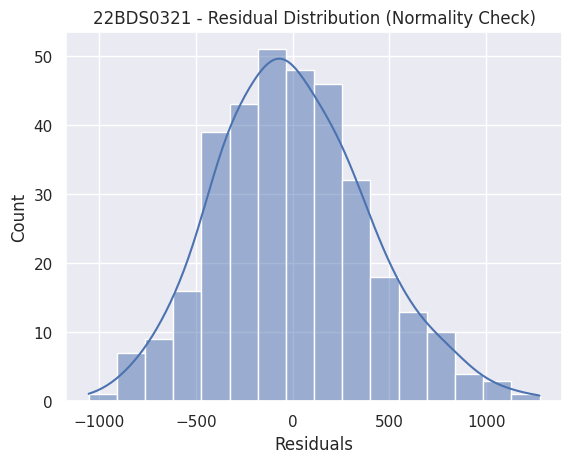

In [136]:
# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_multi, model_multi.predict(X_multi_sm))
print(f"MSE (Mean Squared Error): {mse:.4f}")

# 2. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")

# 3. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_multi, model_multi.predict(X_multi_sm))
print(f"MAE (Mean Absolute Error): {mae:.4f}")

# 4. R² Score (Coefficient of Determination)
r2 = r2_score(y_multi, model_multi.predict(X_multi_sm))
print(f"R² Score: {r2:.4f}")

# 5. Adjusted R²
n = len(y_multi)                          # number of observations
k = X_multi.shape[1]                      # number of predictors
adj_r2 = 1 - (1-r2) * (n-1)/(n-k-1)
print(f"Adjusted R²: {adj_r2:.4f}")

# 6. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_multi - model_multi.predict(X_multi_sm)) / y_multi)) * 100
print(f"MAPE: {mape:.2f}%")

# 7. Explained Variance Score
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_multi, model_multi.predict(X_multi_sm))
print(f"Explained Variance Score: {evs:.4f}")

# 8. Residual analysis
residuals = y_multi - model_multi.predict(X_multi_sm)

print("\nResidual Summary Statistics:")
print(residuals.describe())

# Residual plot
plt.figure(figsize=(7,5))
plt.scatter(model_multi.predict(X_multi_sm), residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("22BDS0321 - Residual Plot (Model Diagnostics)")
plt.show()

# Distribution of residuals
sns.histplot(residuals, kde=True)
plt.title("22BDS0321 - Residual Distribution (Normality Check)")
plt.xlabel("Residuals")
plt.show()

